In [1]:
# Import Python packages
import pickle

# Import Third party packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_spurious_terms(results):
    # Count the number of incorrectly ID'ed terms and missing terms
    for result in results:
        coeffs = result['coeffs']
        spurious_terms = 0
        # Count the incorrect terms identified
        for term in coeffs:
            if term not in ['u', 'du/dx', 'f', 'u^{2}']:
                # if it isn't, increment counter
                spurious_terms += 1
        # Count if any terms are missing from learned model
        for term in ['u', 'du/dx', 'f', 'u^{2}']:
            if term not in coeffs:
                # if it isn't, increment counter
                spurious_terms += 1
        result['spurious'] = spurious_terms
    return results

In [3]:
# Prepare the results list
file_stem = "./data/Fig4a-NLSL-"
results = pickle.load(open(file_stem +"results.pickle", "rb"))
results = compute_spurious_terms(results)
# Prepare lists for plotting
plot_nm = [result['noise_mag'] for result in results]
plot_losses = [result['loss'] for result in results]
min_loss = min(plot_losses)
plot_losses = [loss-min_loss for loss in plot_losses]
plot_spurious = [result['spurious'] for result in results]

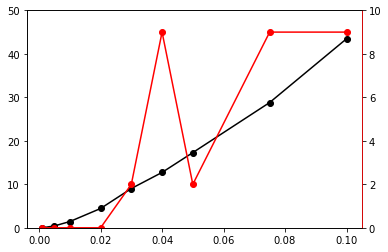

In [4]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20

figsize = (6,4)
# Create figure
plt.figure(figsize=figsize)
# set axes
ax1 = plt.gca()
ax1.autoscale(False, axis='y')
ax2 = ax1.twinx()

pltstyle=dict(linestyle=None,marker='o')
ax1.plot(plot_nm, plot_losses, color='black', label = "PDE Find Loss Error", **pltstyle)
ax2.plot(plot_nm, plot_spurious, color='red', label="# Spurious Terms", **pltstyle)
ax2.spines['right'].set_color('red')
# Place the legend
lines = ax1.get_lines()+ax2.get_lines()
labels = [line.get_label() for line in lines]
labels = ['' for line in lines]
# adjust axis scales
ax1.set_ylim([0,50])
ax2.set_ylim([0,10])

# Turn off all the tick labels
#ax1.tick_params(labelbottom=False, labelleft=False)
#ax2.tick_params(labelright=False)
#ax2.tick_params(axis='y', colors='red')
## Save figure
#plt.savefig('./Figs/4a-NLSL-noise-vs-error.svg', dpi=600, transparent=True)

plt.show()

In [5]:
# Prepare the results list
file_stem = "./data/Fig4b-NLSL-"
results = pickle.load(open(file_stem +"results.pickle", "rb"))
results = compute_spurious_terms(results)
# Prepare lists for plotting
plot_trials = [result['num_trials'] for result in results]
plot_losses = [result['loss']/result['num_trials'] for result in results]
min_loss = min(plot_losses)
plot_losses = [loss-min_loss for loss in plot_losses]
plot_spurious = [result['spurious'] for result in results]

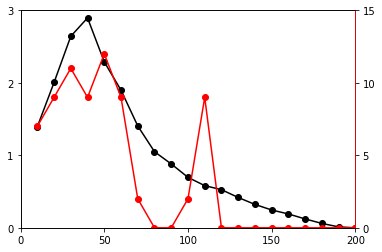

In [6]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20

figsize = (6,4)
# Create figure
plt.figure(figsize=figsize)
# set axes
ax1 = plt.gca()
ax1.autoscale(False, axis='y')
ax2 = ax1.twinx()

pltstyle=dict(linestyle=None,marker='o')
ax1.plot(plot_trials, plot_losses, color='black', label = "PDE Find Loss Error", **pltstyle)
ax2.plot(plot_trials, plot_spurious, color='red', label="# Spurious Terms", **pltstyle)
ax2.spines['right'].set_color('red')
# Place the legend
lines = ax1.get_lines()+ax2.get_lines()
labels = [line.get_label() for line in lines]
labels = ['' for line in lines]
# adjust axis scales
ax1.set_ylim([0, 3])
ax2.set_ylim([0, 15])


ax1.set_yticks([0,1,2,3])
ax2.set_yticks([0,5,10,15])
plt.xticks([0,50,100,150,200])
plt.xlim([0, 200])

# Turn off all the tick labels
#ax1.tick_params(labelbottom=False, labelleft=False)
#ax2.tick_params(labelright=False)
#ax2.tick_params(axis='y', colors='red')
#
## Save figure
#plt.savefig('./Figs/4b-NLSL-trials-vs-error.svg', dpi=600, transparent=True)

plt.show()

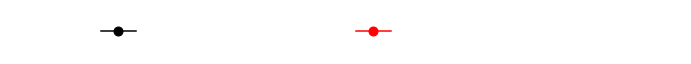

In [7]:
# Create separate axes
legend_figsize = (figsize[0]*2, figsize[1]/5)
plt.figure(figsize=legend_figsize)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
plt.legend(lines, labels, ncol=2, loc='center', frameon=False)
#plt.savefig('./Figs/4-legend.svg', dpi=600, transparent=True)